In [13]:
!pip install scikit-learn pandas nltk

In [27]:
import nltk
nltk.download('movie_reviews')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import movie_reviews
import random

# Load reviews and their categories (pos or neg)
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the dataset
random.shuffle(documents)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [19]:
from nltk import FreqDist
from nltk.corpus import stopwords
import string

# Build frequency distribution of top 2000 words
all_words = [w.lower() for w in movie_reviews.words() if w.isalpha()]
all_words = [w for w in all_words if w not in stopwords.words('english')]
freq_dist = FreqDist(all_words)
word_features = list(freq_dist)[:2000]

def document_features(document):
    words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in words)
    return features

# Apply feature extractor
featuresets = [(document_features(d), c) for (d, c) in documents]

In [20]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split into features and labels
X_dict = [f for (f, label) in featuresets]
y = [label for (f, label) in featuresets]

# Vectorize the dictionary features
vec = DictVectorizer(sparse=False)
X = vec.fit_transform(X_dict)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8525
              precision    recall  f1-score   support

         neg       0.88      0.83      0.86       210
         pos       0.83      0.87      0.85       190

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [23]:
def predict_sentiment(text):
    from nltk.tokenize import word_tokenize
    words = word_tokenize(text.lower())
    feats = document_features(words)
    vect_feats = vec.transform([feats])
    return model.predict(vect_feats)[0]

neg
pos


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
sentences = [
    "I absolutely loved this movie!",
    "It was a total waste of time.",
    "The acting was fantastic and emotional.",
    "I didn’t like the storyline at all.",
    "Beautiful cinematography, but weak plot.",
    "Worst film I’ve seen in years.",
    "It was okay, not great.",
    "I would watch it again, amazing!",
    "Boring and predictable.",
    "Surprisingly good and heartwarming."
]

# Count sentiments
pos_count = 0
neg_count = 0

for sentence in sentences:
    label = predict_sentiment(sentence)
    if label == 'pos':
        pos_count += 1
    else:
        neg_count += 1


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /ro

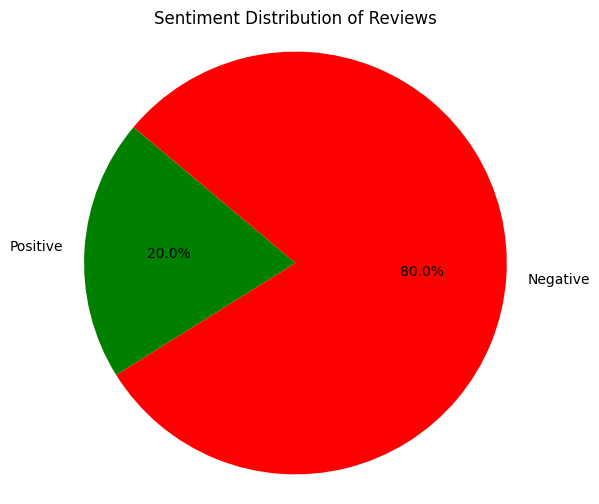

In [30]:
import matplotlib.pyplot as plt

# Labels and values
labels = ['Positive', 'Negative']
sizes = [pos_count, neg_count]
colors = ['green', 'red']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')  # Make the pie chart circular
plt.show()
